In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import pickle
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from data_preparation import prepare_dataloaders
from model import MiniVGGNet
from model_utils import train_model, evaluate_model, plot_training_history


In [ ]:

train_loader, val_loader, test_loader, class_to_idx = prepare_dataloaders(
    train_dir='./datasets/img/train',
    test_dir='./datasets/img/test',
    batch_size=8
)

In [6]:

# Create model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = len(class_to_idx)
cnnmodel = MiniVGGNet(num_classes=num_classes).to(device)

Epoch [1/30] Train Loss: 1.4151 Train Acc: 0.4125 Val Loss: 0.7366 Val Acc: 0.8167
Epoch [2/30] Train Loss: 0.7088 Train Acc: 0.7792 Val Loss: 0.4695 Val Acc: 0.7667
Epoch [3/30] Train Loss: 0.3910 Train Acc: 0.9125 Val Loss: 0.3145 Val Acc: 0.9333
Epoch [4/30] Train Loss: 0.2542 Train Acc: 0.9458 Val Loss: 0.1596 Val Acc: 0.9667
Epoch [5/30] Train Loss: 0.2423 Train Acc: 0.9333 Val Loss: 0.0883 Val Acc: 0.9833
Epoch [6/30] Train Loss: 0.1793 Train Acc: 0.9583 Val Loss: 0.1038 Val Acc: 0.9500
Epoch [7/30] Train Loss: 0.1624 Train Acc: 0.9542 Val Loss: 0.0492 Val Acc: 0.9833
Epoch [8/30] Train Loss: 0.1271 Train Acc: 0.9833 Val Loss: 0.0839 Val Acc: 0.9667
Epoch [9/30] Train Loss: 0.1343 Train Acc: 0.9583 Val Loss: 0.0853 Val Acc: 0.9833
Epoch [10/30] Train Loss: 0.0804 Train Acc: 0.9833 Val Loss: 0.0508 Val Acc: 0.9833
Epoch [11/30] Train Loss: 0.1328 Train Acc: 0.9583 Val Loss: 0.0615 Val Acc: 0.9833
Epoch [12/30] Train Loss: 0.1173 Train Acc: 0.9583 Val Loss: 0.0976 Val Acc: 0.9667
E

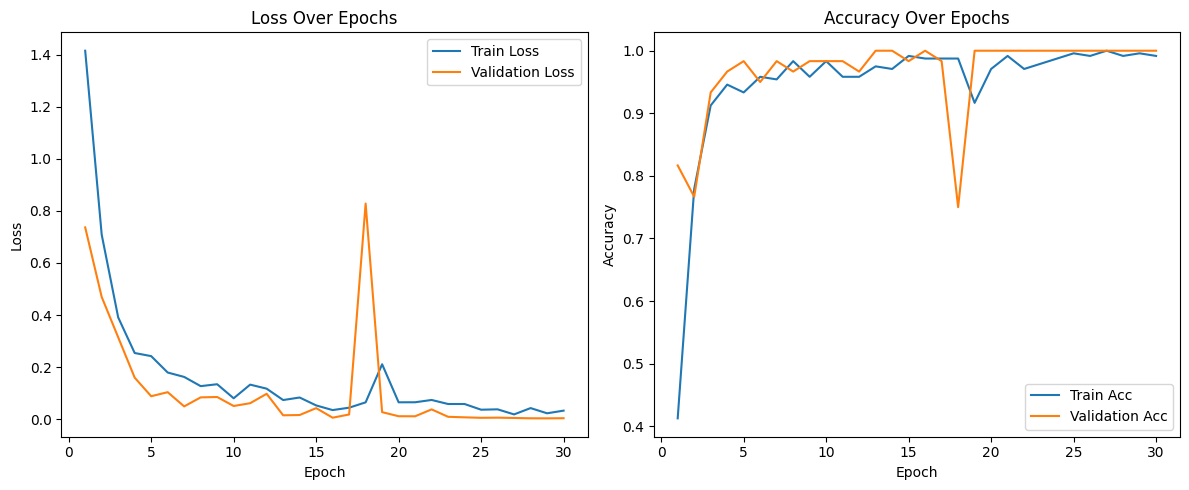

In [7]:
# Train the model
cnnmodel, history = train_model(cnnmodel, train_loader, val_loader, num_epochs=30, device=device)

# Plot history
plot_training_history(history)


Accuracy: 0.9000
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       0.67      0.80      0.73        10
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



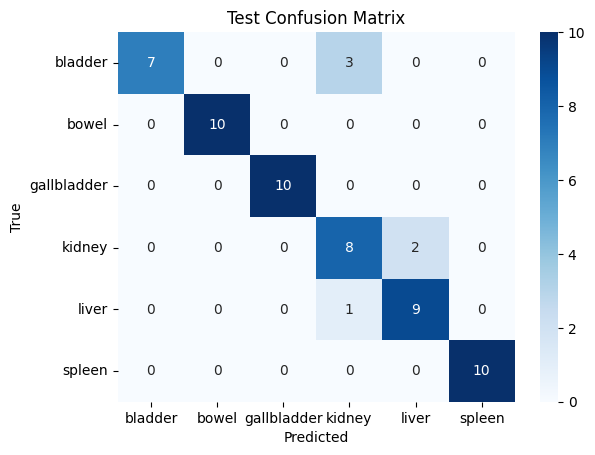

In [8]:
# Evaluate
test_acc, cm, all_labels, all_preds = evaluate_model(cnnmodel, test_loader, device=device)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_to_idx.keys(), yticklabels=class_to_idx.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix')
plt.show()

In [9]:
#unpack data
train_loss, val_loss, train_acc, val_acc = history

# 1. Save model
torch.save(cnnmodel.state_dict(), 'results/results-run-2/ultrasound_cnn.pth')

# 2. Save training history
np.savez('results/results-run-2/my_training_history.npz', 
         train_loss=train_loss, 
         val_loss=val_loss, 
         train_acc=train_acc, 
         val_acc=val_acc)

# 3. Save confusion matrix
with open('results/results-run-2/my_confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)

# 4. Save classification report
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_preds, output_dict=True)

with open('results/results-run-2/my_classification_report.json', 'w') as f:
    json.dump(report, f, indent=4)

print(" All files saved successfully in 'results/results-run-2' folder!")

 All files saved successfully in 'results/results-run-2' folder!
